In [1]:
# 기본 라이브러리 불러오기
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# Breast Cancer 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

# 열 이름 지정
df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
              'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']

# 데이터셋의 크기
print(df.shape)

(699, 11)


In [2]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
df.sample(5)

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
622,1140597,7,1,2,3,2,1,2,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
44,1103608,10,10,10,4,8,1,8,10,1,4
361,877943,3,10,3,10,6,10,5,1,4,4
421,1257200,10,10,10,7,10,10,8,2,1,4


In [3]:
# 데이터 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithlial        699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nucleoli  699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
# 데이터 통계 요약정보 확인
df.describe(include='all')

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [5]:
# 누락 데이터 확인
df.isnull().sum()

id                 0
clump              0
cell_size          0
cell_shape         0
adhesion           0
epithlial          0
bare_nuclei        0
chromatin          0
normal_nucleoli    0
mitoses            0
class              0
dtype: int64

In [6]:
# 중복 데이터 확인
df.duplicated().sum()

8

In [7]:
# 목표변수 
df['class'].value_counts(normalize=True)

class
2    0.655222
4    0.344778
Name: proportion, dtype: float64

In [8]:
# 목표변수를 이진 변수로 변환 - 2: benign(양성), 4: malignant(악성)
df['class'] = df['class'].map({2:0, 4:1})
df['class'].value_counts(normalize=True)

class
0    0.655222
1    0.344778
Name: proportion, dtype: float64

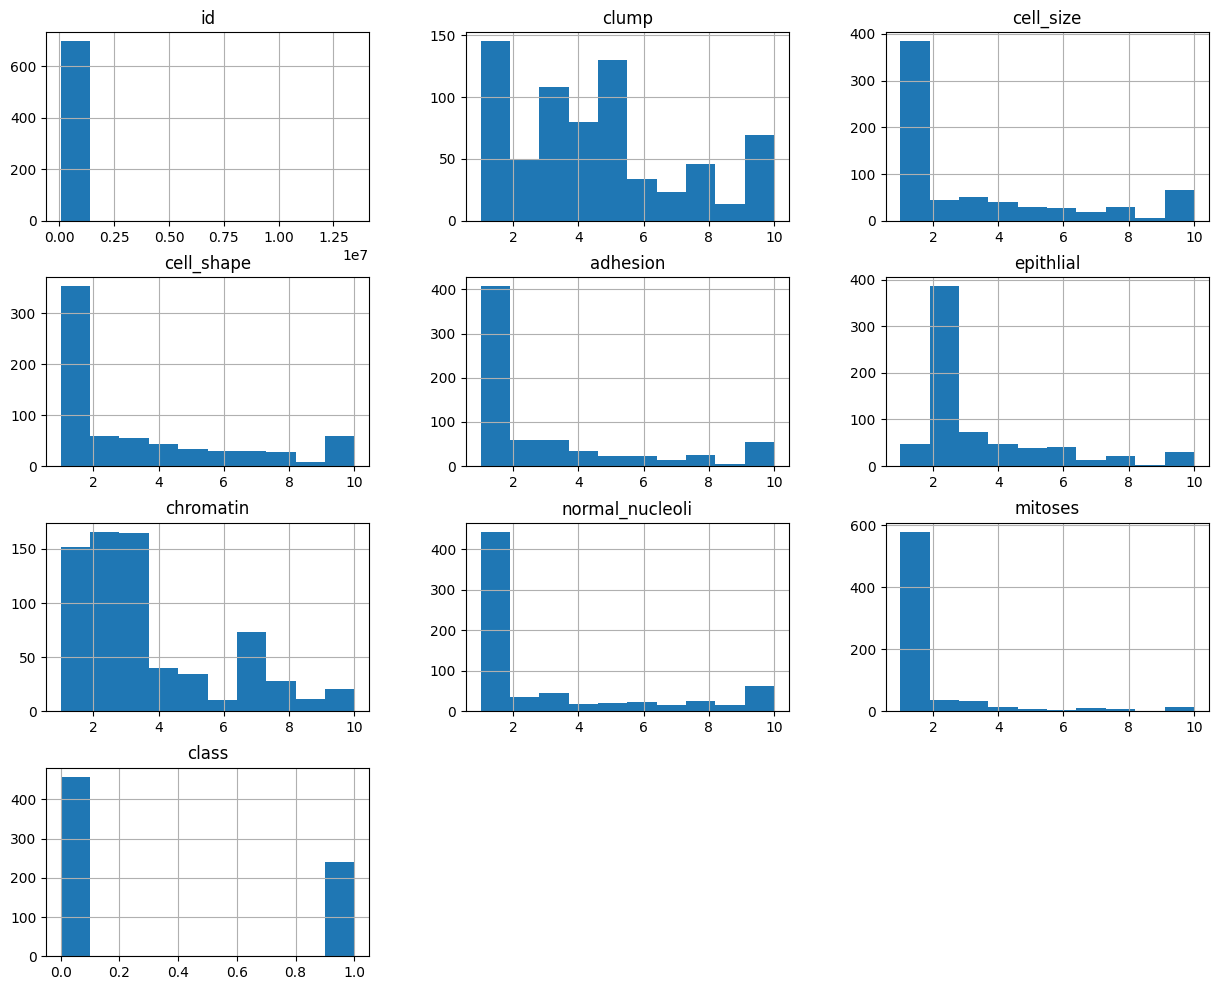

In [9]:
# pandas hist 시각화
df.hist(figsize=(15, 12));

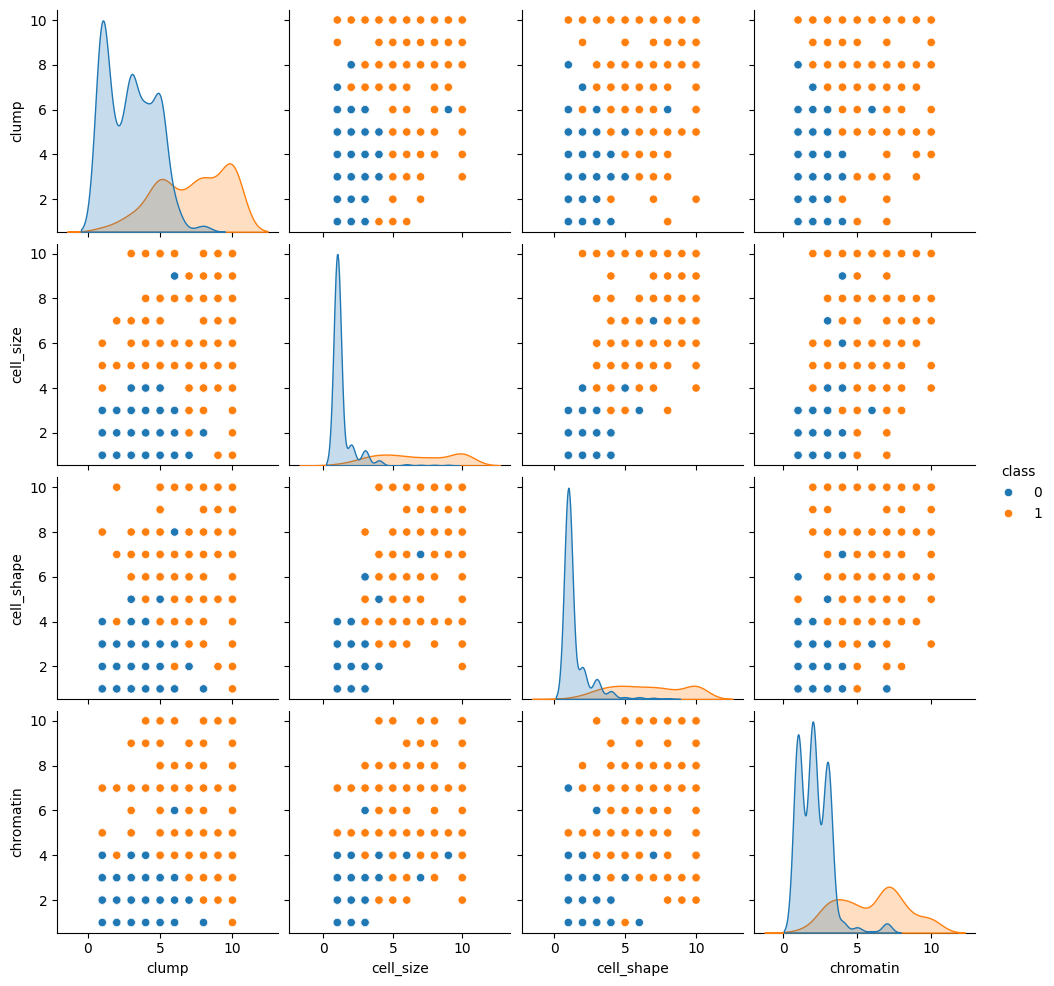

In [10]:
# seaborn pairplot 시각화
vis_cols = ['clump', 'cell_size', 'cell_shape', 'chromatin',  'class']
sns.pairplot(data=df[vis_cols], hue='class');

In [11]:
'''
[Step 3] 데이터 전처리
'''

# 중복 데이터 제거
print('중복 제거 이전: ', df.shape)
df = df.drop_duplicates()
print('중복 제거 이후: ', df.shape)

중복 제거 이전:  (699, 11)
중복 제거 이후:  (691, 11)


In [12]:
### bare_nuclei 열의 자료형 변경 (문자열 ->숫자)
# bare_nuclei 열의 고유값 확인
print('bare_nuclei 열의 고유값: ', df['bare_nuclei'].unique())

df['bare_nuclei'] = df['bare_nuclei'].replace('?', np.nan)    # '?'을 np.nan으로 변경
df = df.dropna(subset=['bare_nuclei'], axis=0)                # 누락데이터 행을 삭제
df['bare_nuclei'] = df['bare_nuclei'].astype('int')           # 문자열을 숫자형으로 변환

# 데이터 통계 요약정보 확인
df.describe()

bare_nuclei 열의 고유값:  ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
count,6.750000e+02,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,1.078448e+06,4.451852,3.146667,3.208889,2.848889,3.229630,3.537778,3.442963,2.885926,1.607407,0.349630
std,6.229108e+05,2.820859,3.055005,2.976552,2.875917,2.208497,3.637871,2.453894,3.065607,1.741006,0.477207
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.781505e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171845e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238777e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [13]:
'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
train_features = ['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
                  'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses']
X = df[train_features]         # 설명 변수 X
y = df['class']                # 예측 변수 Y

# 설명 변수 데이터를 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (472, 9)
test data 개수:  (203, 9)


In [14]:
'''
[Step 5] Decision Tree 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 Decision Tree 분류 모형 가져오기

# 모형 객체 생성 (criterion='entropy' 적용)
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

# train data를 가지고 모형 학습
tree_model.fit(X_train, y_train)

# test data를 가지고 y_hat을 예측 (분류)
y_hat = tree_model.predict(X_test)      

print(y_hat[0:10])
print(y_test.values[0:10])

[0 1 1 0 0 1 1 0 0 1]
[0 1 1 0 0 1 1 0 0 1]


In [15]:
# 모형 성능 평가 - Confusion Matrix 계산
tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)

[[123   7]
 [  2  71]]


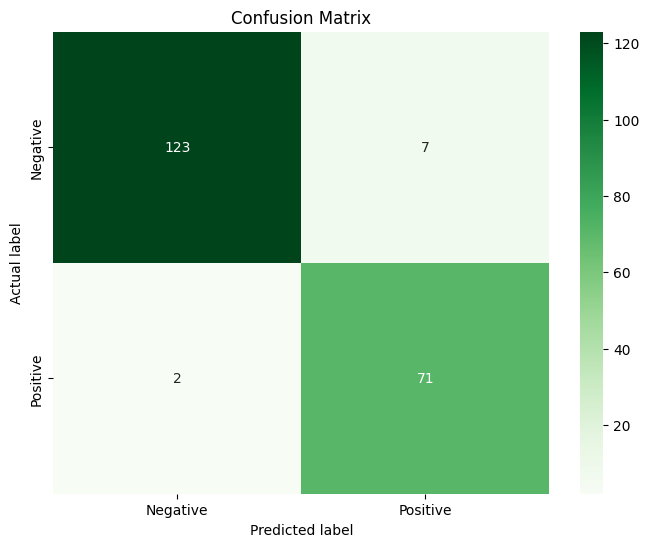

In [16]:
# Confusion Matrix 시각화

plt.figure(figsize=(8, 6))
sns.heatmap(tree_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [17]:
# 모형 성능 평가 - 평가지표 계산
tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       130
           1       0.91      0.97      0.94        73

    accuracy                           0.96       203
   macro avg       0.95      0.96      0.95       203
weighted avg       0.96      0.96      0.96       203



In [18]:
# 특성 중요도 출력
features = pd.DataFrame(tree_model.feature_importances_, 
                        index=train_features, 
                        columns=['Importance'])
features = features.sort_values(by='Importance', ascending=False)
features

,Importance
cell_size,0.707854
bare_nuclei,0.137466
clump,0.086802
chromatin,0.023651
epithlial,0.017665
adhesion,0.014764
normal_nucleoli,0.011798
cell_shape,0.000000
mitoses,0.000000


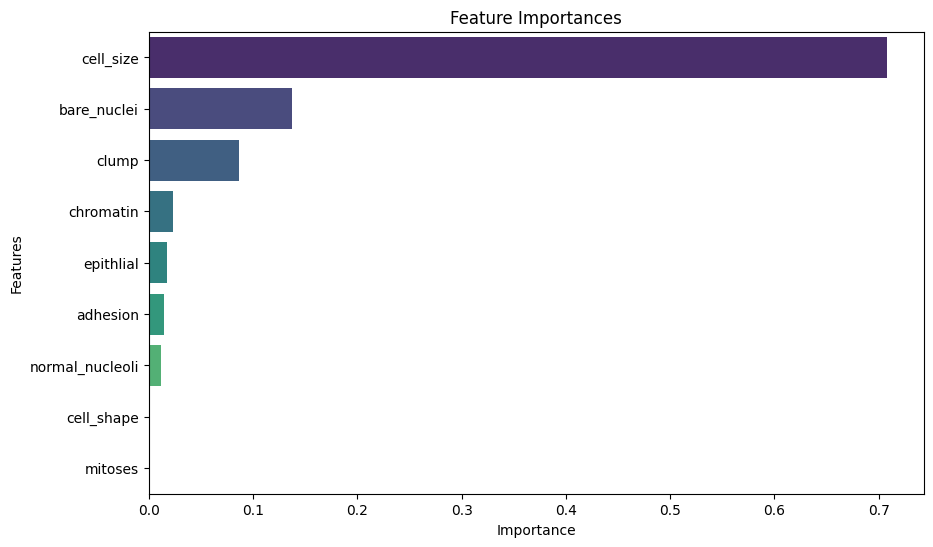

In [19]:
# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=features.Importance, y=features.index,
            hue=features.index, legend=False,
            palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()